In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import disk
import os
import sys
import math
import skimage
from skimage import morphology
from skimage import img_as_float
from skimage import img_as_ubyte
from skimage import img_as_uint
from skimage import io
from skimage import util
from scipy.ndimage.filters import convolve
from scipy import signal
from skimage.filters import threshold_otsu
from skimage.filters import rank
from skimage.filters import median

from skimage import img_as_float #convert img, we should use this function. Do Not Use np.astype
from skimage import transform
from skimage.filters.rank import median
from skimage import data, filters

from retinaSeg import retinahelpfunction as rhf
from retinaSeg import retinapreprocess as rpp
import cv2



In [2]:

def morphology_line(length,degree = None):
    if degree != None:
        line = np.zeros((length,length))
        center = int(length/2)
        line[center,:] = 1
        return line
    else:
        line = np.zeros((length,length))
        center = int(length/2)
        line[center,:] = 1
        line = transform.rotate(line,degree)
        return line
    
def rotate_line_opening(img,rotateNum,length,option = 'sup'):
    if option =='sup':
        col,row = img.shape
        result = img
        degree = 180 / rotateNum
        for cnt in range(rotateNum+1):
            if cnt ==0:
                #temp = morphology.opening(img,rhf.strel_line(length,degree * cnt))
                #temp = morphology.dilation(img,rhf.strel_line(length,degree * cnt))
                pass
                #result = temp

            rotateSe1 = rhf.strel_line(length,degree *cnt)
            temp = morphology.opening(img,rotateSe1)
            result = np.dstack([result,temp] )

        '''
        for cnt in range(rotateNum+1):
            rhf.show_on_jupyter(result[:,:,cnt],'gray',str(degree * cnt))
        '''
        finalResult = np.zeros((col,row))
        #print(result.shape)
        for i in range(col):
            for j in range(row):
                #print(result[i,j,:])
                    finalResult[i,j] = np.max(result[i,j,:])
        
        #print(finalResult.shape)
        #print(finalResult)
        #rhf.show_on_jupyter(img,'gray','original')
        #rhf.show_on_jupyter(finalResult,'gray','result')
    elif option =='inf':
        col,row = img.shape
        result = img
        degree = 165 / rotateNum
        for cnt in range(rotateNum+1):
            if cnt ==0:
                pass

            rotateSe1 = rhf.strel_line(length,degree *cnt)
            temp = morphology.opening(img,rotateSe1)
            result = np.dstack([result,temp] )

        finalResult = np.zeros((col,row))
        for i in range(col):
            for j in range(row):
                    finalResult[i,j] = np.min(result[i,j,:])

    return finalResult
    
def interval_mapping(image, from_min, from_max, to_min, to_max):
    # map values from [from_min, from_max] to [to_min, to_max]
    # image: input array
    from_range = from_max - from_min
    to_range = to_max - to_min
    scaled = np.array((image - from_min) / float(from_range), dtype=float)
    return to_min + (scaled * to_range)

In [3]:
'''
Data area.
Vessel images.
RGB color spaces.
from slip lamp.
'''
vesselPath01 = './data/18.06.25/18_06_25_04.jpg'
vesselPath02 = './data/18.06.25/18_06_25_03.bmp'
vesselPath03 = './data/18.06.25/18_06_25_06.bmp'
vesselPath04 = './data/18.06.25/18_08_03_01.jpeg'
vesselPath05 = './data/18.06.25/18_08_03_02.jpeg'

what ori len :  3
what len :  2


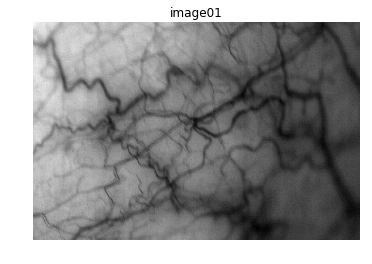

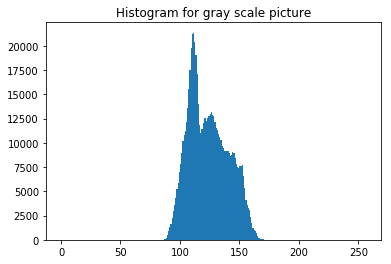

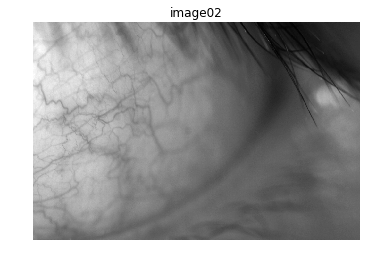

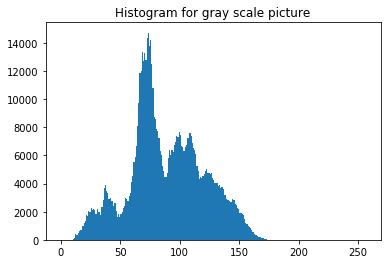

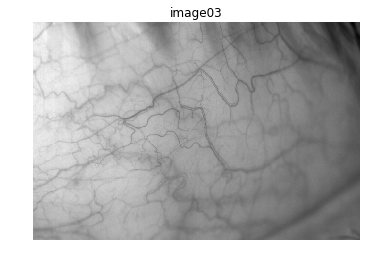

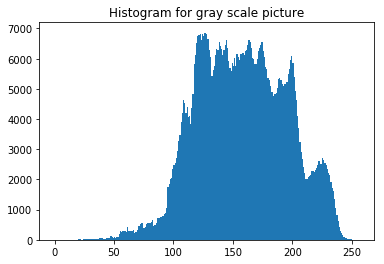

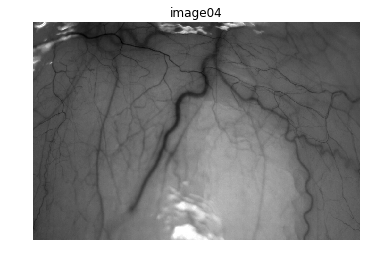

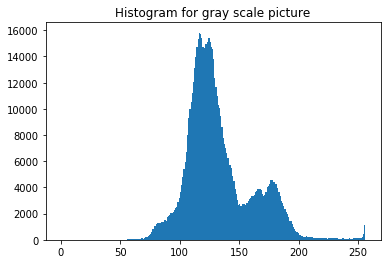

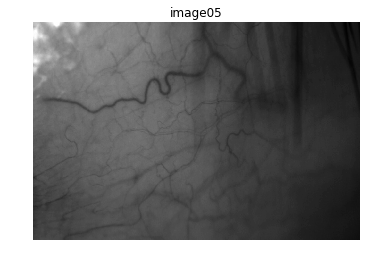

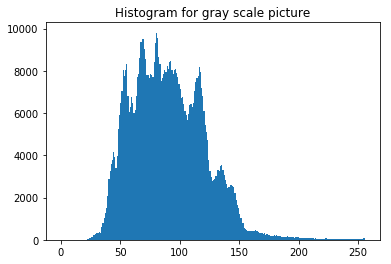

'\nimages have many valley and peak.\nwhat this images mean are we should make images that have less valley and peak for classify two class.\nenhance foreground images and (vessel image) supress background images (non vessel image)\n'

In [4]:
'''
import image datas.
using 'io' library.
showing histogram in gray color space images.
(histogram is plotted by 'rhf' library)
'''
tempImg01 = io.imread(vesselPath01)
print('what ori len : ',len(tempImg01.shape))
vesselImg01 = cv2.resize(tempImg01[:,:,1],(1020,680))
print('what len : ',len(vesselImg01.shape))
vesselImg02 = cv2.resize(io.imread(vesselPath02) , (1020,680))
tempImg03 = io.imread(vesselPath03)
vesselImg03 = cv2.resize(tempImg03[:,:,1],(1020,680))

tempImg04 = io.imread(vesselPath04)
tempImg05 = io.imread(vesselPath05)
vesselImg04 = cv2.resize(tempImg04[:,:,1] ,(1020,680))
vesselImg05 = cv2.resize(tempImg05[:,:,1] ,(1020,680))

rhf.show_on_jupyter(vesselImg01,'gray','image01')
rhf.show_histogram(vesselImg01,'gray')
rhf.show_on_jupyter(vesselImg02,'gray','image02')
rhf.show_histogram(vesselImg02,'gray')
rhf.show_on_jupyter(vesselImg03,'gray','image03')
rhf.show_histogram(vesselImg03,'gray')
rhf.show_on_jupyter(vesselImg04,'gray','image04')
rhf.show_histogram(vesselImg04,'gray')
rhf.show_on_jupyter(vesselImg05,'gray','image05')
rhf.show_histogram(vesselImg05,'gray')

'''
images have many valley and peak.
what this images mean are we should make images that have less valley and peak for classify two class.
enhance foreground images and (vessel image) supress background images (non vessel image)
'''

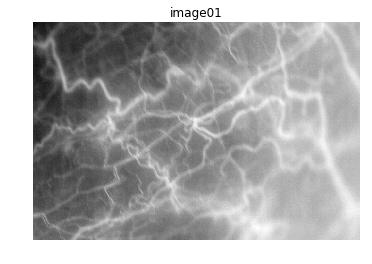

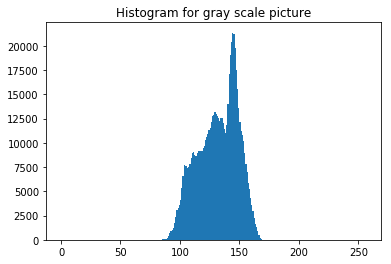

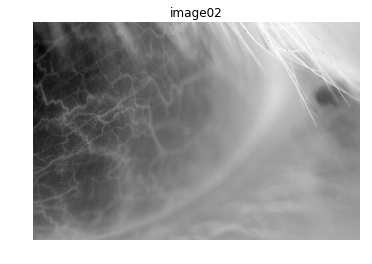

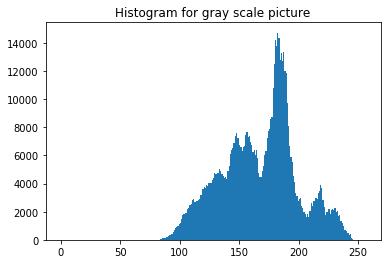

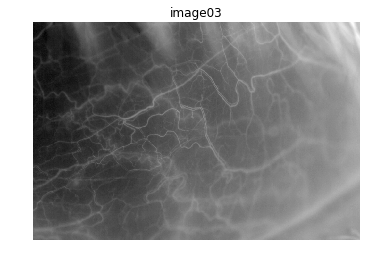

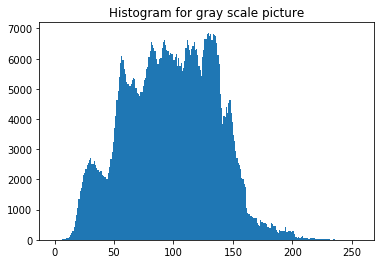

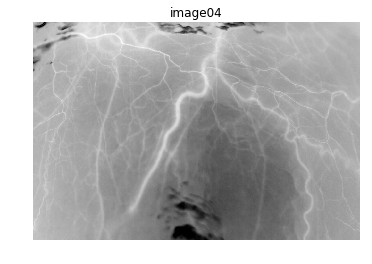

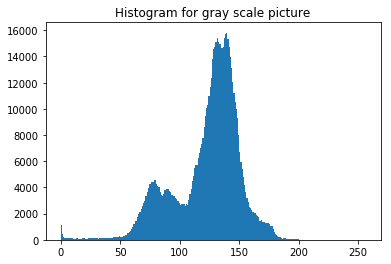

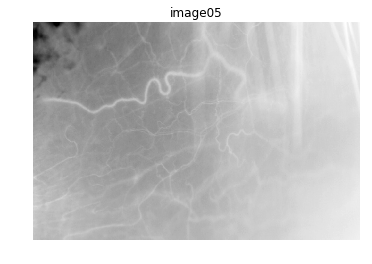

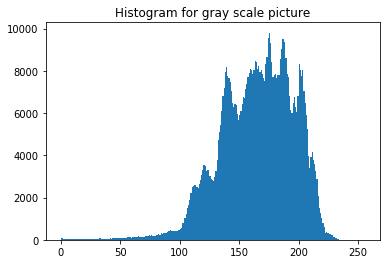

In [5]:
invertImg01 = util.invert(vesselImg01)
invertImg02 = util.invert(vesselImg02)
invertImg03 = util.invert(vesselImg03)
invertImg04 = util.invert(vesselImg04)
invertImg05 = util.invert(vesselImg05)

rhf.show_on_jupyter(invertImg01,'gray','image01')
rhf.show_histogram(invertImg01,'gray')
rhf.show_on_jupyter(invertImg02,'gray','image02')
rhf.show_histogram(invertImg02,'gray')
rhf.show_on_jupyter(invertImg03,'gray','image03')
rhf.show_histogram(invertImg03,'gray')
rhf.show_on_jupyter(invertImg04,'gray','image04')
rhf.show_histogram(invertImg04,'gray')
rhf.show_on_jupyter(invertImg05,'gray','image05')
rhf.show_histogram(invertImg05,'gray')

In [ ]:
invertImg01 = vesselImg01
invertImg02 = vesselImg02
invertImg03 = vesselImg03
invertImg04 = vesselImg04
invertImg05 = vesselImg05

rhf.show_on_jupyter(invertImg01,'gray','image01')
rhf.show_histogram(invertImg01,'gray')
rhf.show_on_jupyter(invertImg02,'gray','image02')
rhf.show_histogram(invertImg02,'gray')
rhf.show_on_jupyter(invertImg03,'gray','image03')
rhf.show_histogram(invertImg03,'gray')
rhf.show_on_jupyter(invertImg04,'gray','image04')
rhf.show_histogram(invertImg04,'gray')
rhf.show_on_jupyter(invertImg05,'gray','image05')
rhf.show_histogram(invertImg05,'gray')

we know that the brightness pixels are background and darkness pixels are foreground.

but microvessel can not classify the foreground classs.
that's why the microvessel is influenced by non-uniform light.

when the slit lamp (or another machine) captured image, the light be affected captured images.

#### hardware
As much as possible, hardware should eliminate the non-uniform light.
#### software
As much as possible, software should correct the non-uniform light to uniform.

so, I will preprocess the images to correct the non-uniform light before enhance the image's feature.

##### preprocess
1. correct non-uniform light.
    - <paper> Luminosity and contrast normalization in retinal images
2. adaptive histogram equlization.
    - skimage's function.



resized img shape :  (680, 1020)
mean Full shape :  (680, 1020)
resized img shape :  (680, 1020)
mean Full shape :  (680, 1020)
resized img shape :  (680, 1020)
mean Full shape :  (680, 1020)
resized img shape :  (680, 1020)
mean Full shape :  (680, 1020)
resized img shape :  (680, 1020)
mean Full shape :  (680, 1020)
(680, 1020)


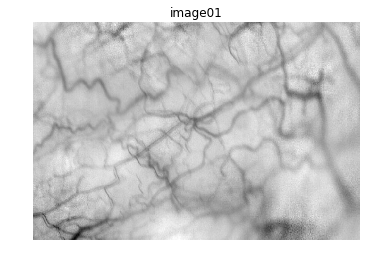

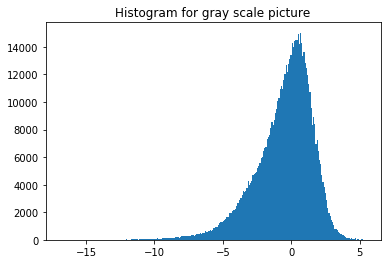

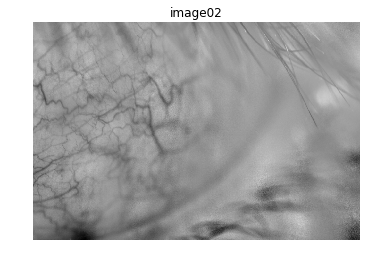

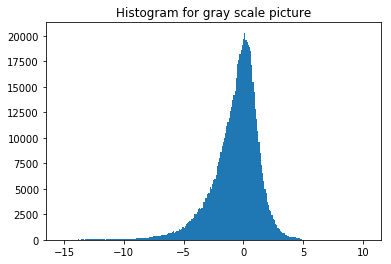

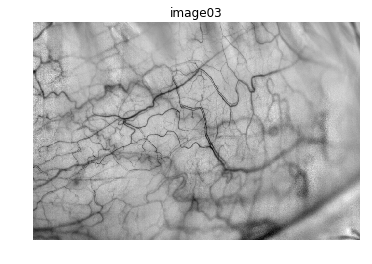

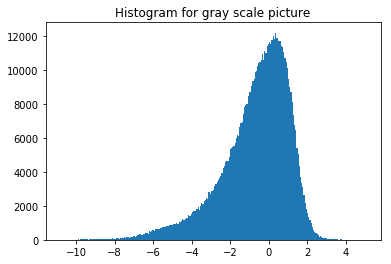

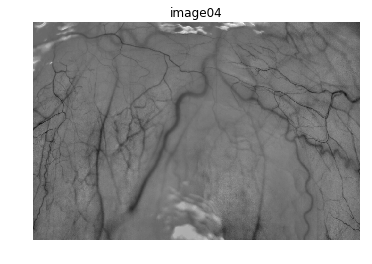

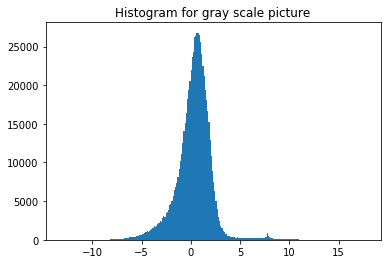

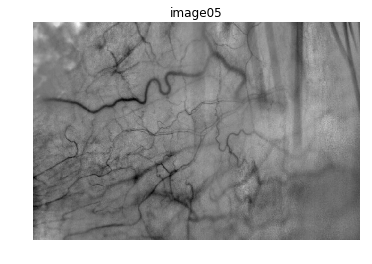

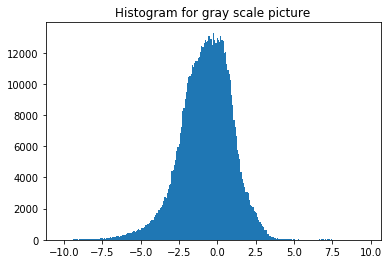

In [9]:
# preprocessing 
resizedVal = (1020,680)
blockSize = (102,68)

uniformImg01 = rpp.luminosity_contrast_normalization(vesselImg01,blockSize,resizedVal)
uniformImg02 = rpp.luminosity_contrast_normalization(vesselImg02,blockSize,resizedVal)
uniformImg03 = rpp.luminosity_contrast_normalization(vesselImg03,blockSize,resizedVal)
uniformImg04 = rpp.luminosity_contrast_normalization(vesselImg04,blockSize,resizedVal)
uniformImg05 = rpp.luminosity_contrast_normalization(vesselImg05,blockSize,resizedVal)
'''
uniformImg01 = rpp.luminosity_contrast_normalization(invertImg01,blockSize,resizedVal)
uniformImg02 = rpp.luminosity_contrast_normalization(invertImg02,blockSize,resizedVal)
uniformImg03 = rpp.luminosity_contrast_normalization(invertImg03,blockSize,resizedVal)
uniformImg04 = rpp.luminosity_contrast_normalization(invertImg04,blockSize,resizedVal)
uniformImg05 = rpp.luminosity_contrast_normalization(invertImg05,blockSize,resizedVal)
'''
print(uniformImg01.shape)
#skimage.io.imsave('uniformImg.png',uniformImg03)

rhf.show_on_jupyter(uniformImg01,'gray','image01')
rhf.show_histogram(uniformImg01,'gray','float')
rhf.show_on_jupyter(uniformImg02,'gray','image02')
rhf.show_histogram(uniformImg02,'gray','float')
rhf.show_on_jupyter(uniformImg03,'gray','image03')
rhf.show_histogram(uniformImg03,'gray','float')
rhf.show_on_jupyter(uniformImg04,'gray','image04')
rhf.show_histogram(uniformImg04,'gray','float')
rhf.show_on_jupyter(uniformImg05,'gray','image05')
rhf.show_histogram(uniformImg05,'gray','float')


/Users/hyeonwoojeong/.pyenv/versions/3.5.5/envs/bonoProjects/lib/python3.5/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


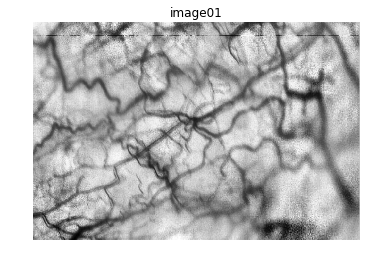

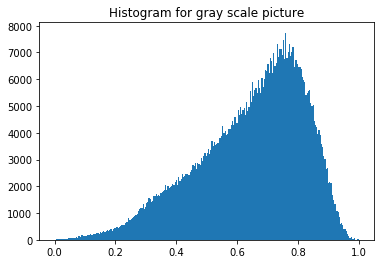

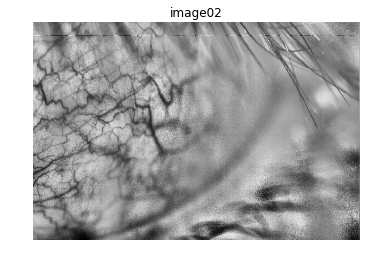

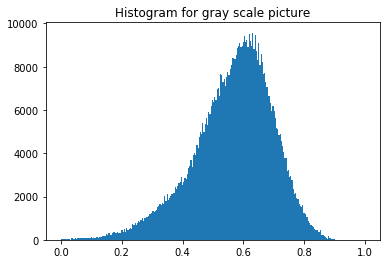

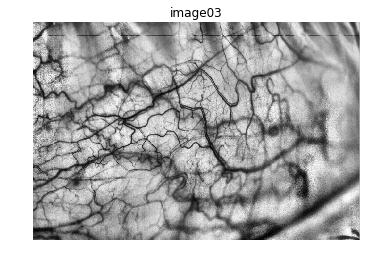

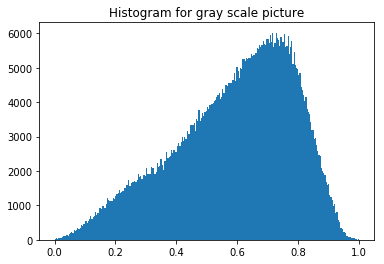

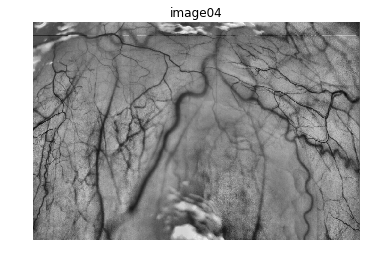

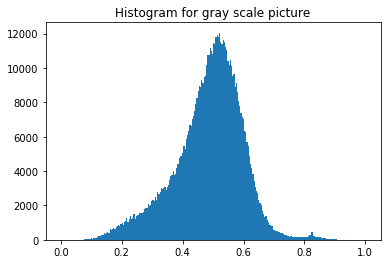

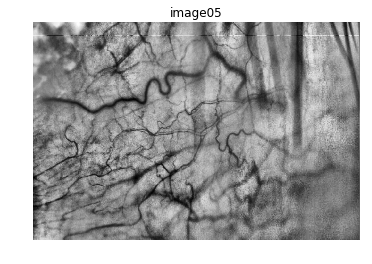

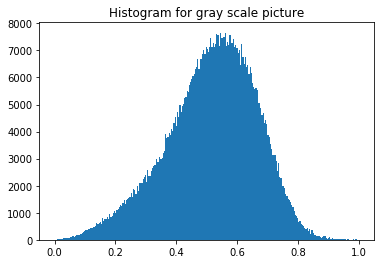

In [6]:
'''
normImg01 = cv2.normalize(img_as_float(uniformImg01), None, 0.0, 1.0, cv2.NORM_MINMAX)
normImg02 = cv2.normalize(img_as_float(uniformImg02), None, 0.0, 1.0, cv2.NORM_MINMAX)
normImg03 = cv2.normalize(img_as_float(uniformImg03), None, 0.0, 1.0, cv2.NORM_MINMAX)
normImg04 = cv2.normalize(img_as_float(uniformImg04), None, 0.0, 1.0, cv2.NORM_MINMAX)
normImg05 = cv2.normalize(img_as_float(uniformImg05), None, 0.0, 1.0, cv2.NORM_MINMAX)
'''



claheImg01 = rpp.clahe_preprocessing(uniformImg01)
claheImg02= rpp.clahe_preprocessing(uniformImg02)
claheImg03 = rpp.clahe_preprocessing(uniformImg03)
claheImg04 = rpp.clahe_preprocessing(uniformImg04)
claheImg05 = rpp.clahe_preprocessing(uniformImg05)

rhf.show_on_jupyter(claheImg01,'gray','image01')
rhf.show_histogram(claheImg01,'gray','float')
rhf.show_on_jupyter(claheImg02,'gray','image02')
rhf.show_histogram(claheImg02,'gray','float')
rhf.show_on_jupyter(claheImg03,'gray','image03')
rhf.show_histogram(claheImg03,'gray','float')
rhf.show_on_jupyter(claheImg04,'gray','image04')
rhf.show_histogram(claheImg04,'gray','float')
rhf.show_on_jupyter(claheImg05,'gray','image05')
rhf.show_histogram(claheImg05,'gray','float')

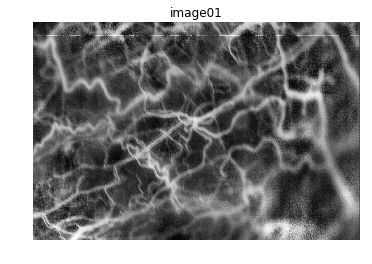

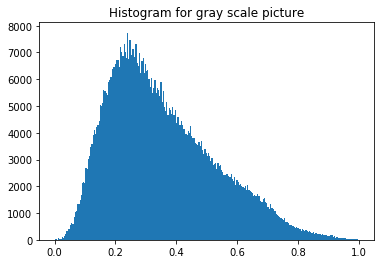

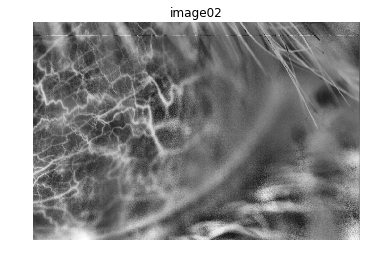

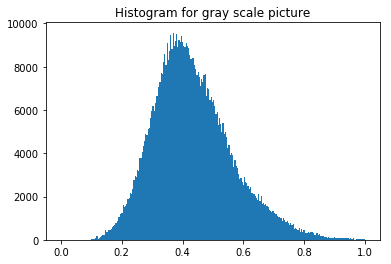

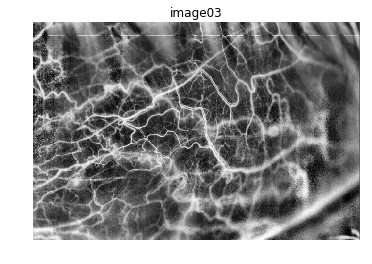

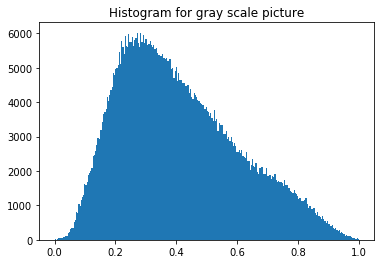

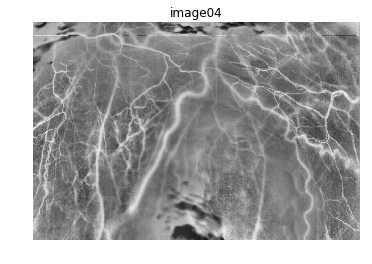

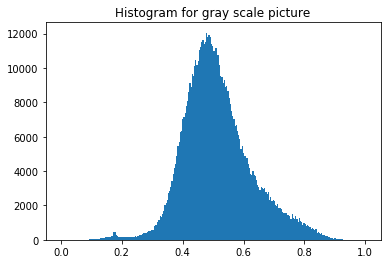

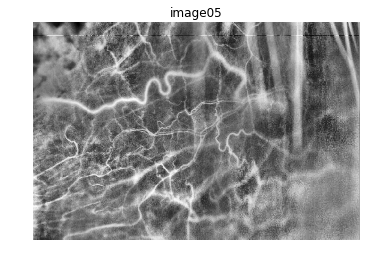

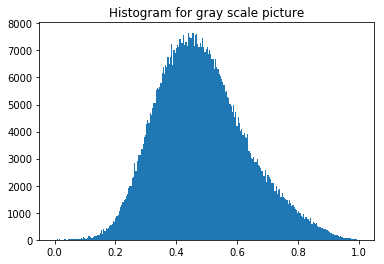

In [8]:
invertImg01 = util.invert(claheImg01)
invertImg02 = util.invert(claheImg02)
invertImg03 = util.invert(claheImg03)
invertImg04 = util.invert(claheImg04)
invertImg05 = util.invert(claheImg05)

rhf.show_on_jupyter(invertImg01,'gray','image01')
rhf.show_histogram(invertImg01,'gray','float')
rhf.show_on_jupyter(invertImg02,'gray','image02')
rhf.show_histogram(invertImg02,'gray','float')
rhf.show_on_jupyter(invertImg03,'gray','image03')
rhf.show_histogram(invertImg03,'gray','float')
rhf.show_on_jupyter(invertImg04,'gray','image04')
rhf.show_histogram(invertImg04,'gray','float')
rhf.show_on_jupyter(invertImg05,'gray','image05')
rhf.show_histogram(invertImg05,'gray','float')



#### rotate morphology operation
enhance the vessel feature (kind of edge)

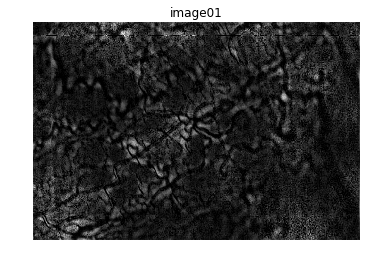

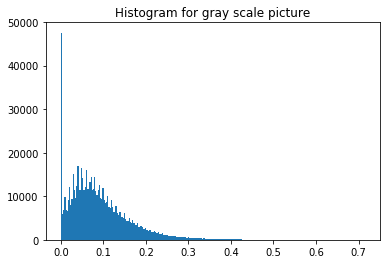

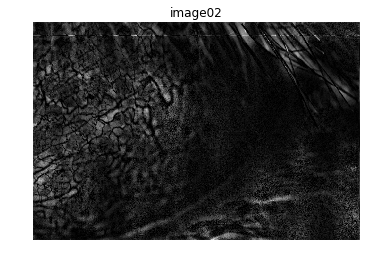

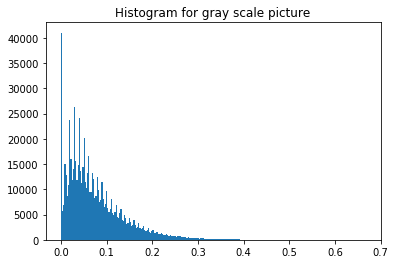

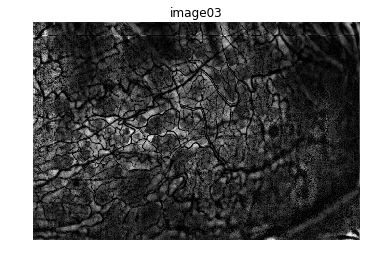

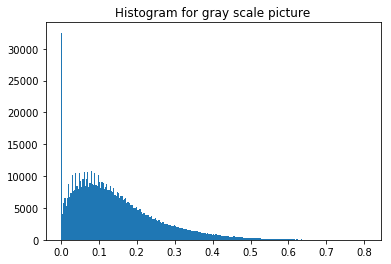

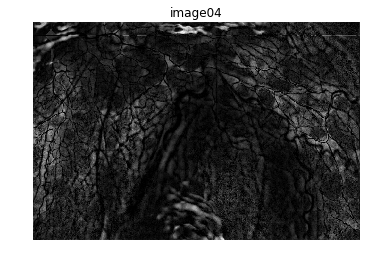

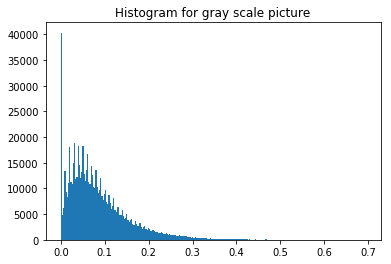

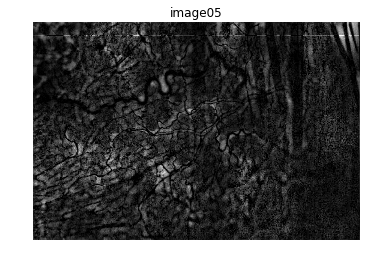

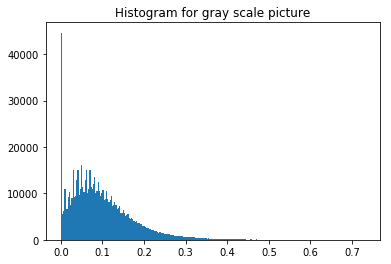

In [7]:
vesselFirstEq01 = rotate_line_opening(claheImg01,18,21)
vesselSecondEq01 = rotate_line_opening(claheImg01,18,25,'inf')
vesselThirdEq01 = np.subtract(vesselFirstEq01,vesselSecondEq01)

vesselFirstEq02 = rotate_line_opening(claheImg02,18,21)
vesselSecondEq02 = rotate_line_opening(claheImg02,18,25,'inf')
vesselThirdEq02 = np.subtract(vesselFirstEq02,vesselSecondEq02)

vesselFirstEq03 = rotate_line_opening(claheImg03,18,21)
vesselSecondEq03 = rotate_line_opening(claheImg03,18,25,'inf')
vesselThirdEq03 = np.subtract(vesselFirstEq03,vesselSecondEq03)

vesselFirstEq04 = rotate_line_opening(claheImg04,18,21)
vesselSecondEq04 = rotate_line_opening(claheImg04,18,25,'inf')
vesselThirdEq04 = np.subtract(vesselFirstEq04,vesselSecondEq04)

vesselFirstEq05 = rotate_line_opening(claheImg05,18,21)
vesselSecondEq05 = rotate_line_opening(claheImg05,18,25,'inf')
vesselThirdEq05 = np.subtract(vesselFirstEq05,vesselSecondEq05)

rhf.show_on_jupyter(vesselThirdEq01,'gray','image01')
rhf.show_histogram(vesselThirdEq01,'gray','float')
rhf.show_on_jupyter(vesselThirdEq02,'gray','image02')
rhf.show_histogram(vesselThirdEq02,'gray','float')
rhf.show_on_jupyter(vesselThirdEq03,'gray','image03')
rhf.show_histogram(vesselThirdEq03,'gray','float')
rhf.show_on_jupyter(vesselThirdEq04,'gray','image04')
rhf.show_histogram(vesselThirdEq04,'gray','float')
rhf.show_on_jupyter(vesselThirdEq05,'gray','image05')
rhf.show_histogram(vesselThirdEq05,'gray','float')


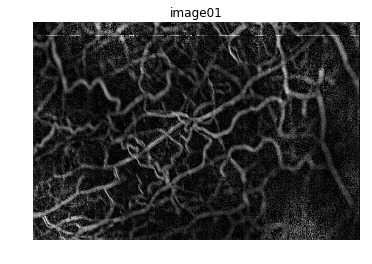

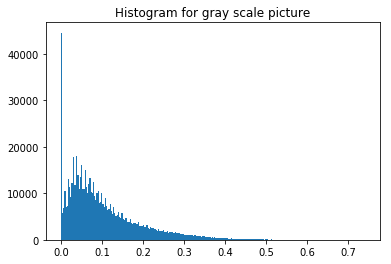

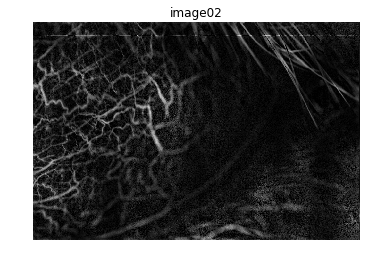

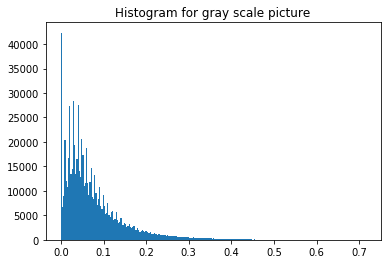

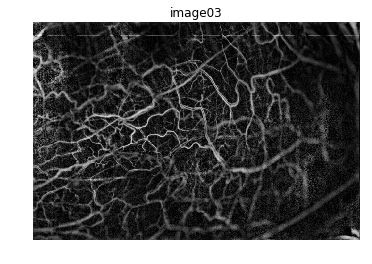

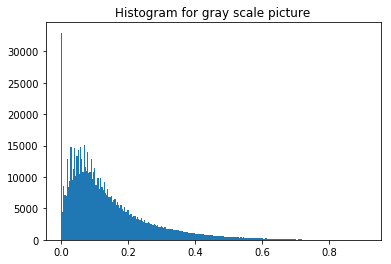

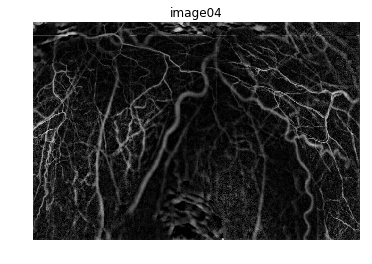

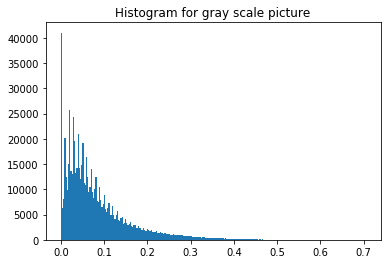

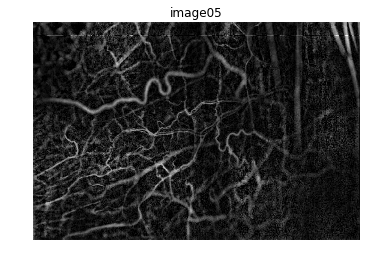

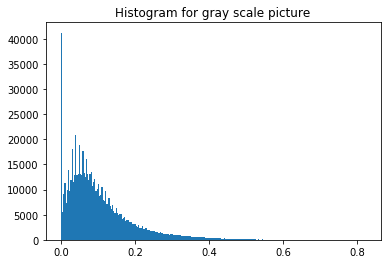

/Users/hyeonwoojeong/.pyenv/versions/3.5.5/envs/bonoProjects/lib/python3.5/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [9]:
vesselFirstEq01 = rotate_line_opening(invertImg01,18,21)
vesselSecondEq01 = rotate_line_opening(invertImg01,18,25,'inf')
vesselThirdEq01 = np.subtract(vesselFirstEq01,vesselSecondEq01)

vesselFirstEq02 = rotate_line_opening(invertImg02,18,21)
vesselSecondEq02 = rotate_line_opening(invertImg02,18,25,'inf')
vesselThirdEq02 = np.subtract(vesselFirstEq02,vesselSecondEq02)

vesselFirstEq03 = rotate_line_opening(invertImg03,18,21)
vesselSecondEq03 = rotate_line_opening(invertImg03,18,25,'inf')
vesselThirdEq03 = np.subtract(vesselFirstEq03,vesselSecondEq03)

vesselFirstEq04 = rotate_line_opening(invertImg04,18,21)
vesselSecondEq04 = rotate_line_opening(invertImg04,18,25,'inf')
vesselThirdEq04 = np.subtract(vesselFirstEq04,vesselSecondEq04)

vesselFirstEq05 = rotate_line_opening(invertImg05,18,21)
vesselSecondEq05 = rotate_line_opening(invertImg05,18,25,'inf')
vesselThirdEq05 = np.subtract(vesselFirstEq05,vesselSecondEq05)

rhf.show_on_jupyter(vesselThirdEq01,'gray','image01')
rhf.show_histogram(vesselThirdEq01,'gray','float')
rhf.show_on_jupyter(vesselThirdEq02,'gray','image02')
rhf.show_histogram(vesselThirdEq02,'gray','float')
rhf.show_on_jupyter(vesselThirdEq03,'gray','image03')
rhf.show_histogram(vesselThirdEq03,'gray','float')
rhf.show_on_jupyter(vesselThirdEq04,'gray','image04')
rhf.show_histogram(vesselThirdEq04,'gray','float')
rhf.show_on_jupyter(vesselThirdEq05,'gray','image05')
rhf.show_histogram(vesselThirdEq05,'gray','float')

skimage.io.imsave('data01.png',vesselThirdEq03)

resized img shape :  (680, 1020)
mean Full shape :  (680, 1020)


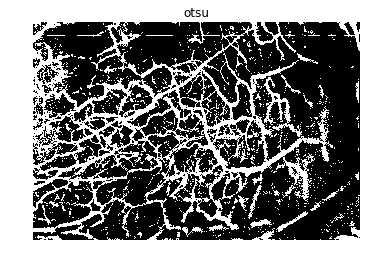

In [10]:
temp = rpp.luminosity_contrast_normalization(vesselThirdEq03,blockSize,resizedVal)
temp = cv2.normalize(img_as_float(temp), None, 0.0, 1.0, cv2.NORM_MINMAX)
thresholdValue03 = threshold_otsu(temp)
ret03, global_otsu03 = cv2.threshold(vesselThirdEq03, thresholdValue03, 1, cv2.THRESH_BINARY)
rhf.show_on_jupyter(global_otsu03,'gray','otsu')


resized img shape :  (680, 1020)
mean Full shape :  (680, 1020)


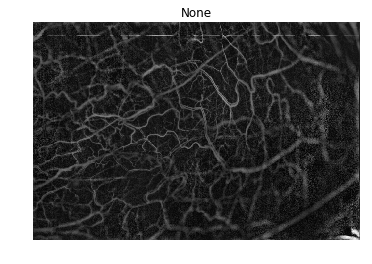

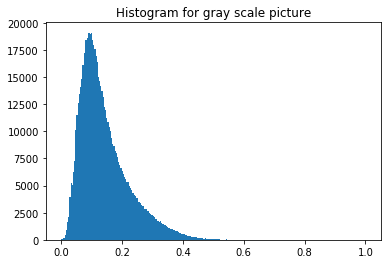

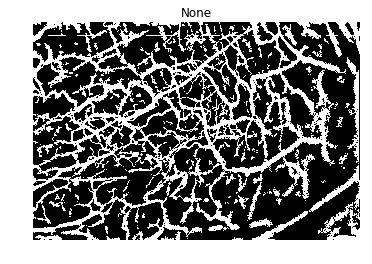

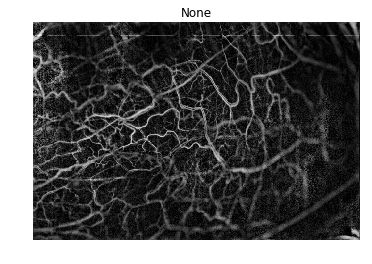

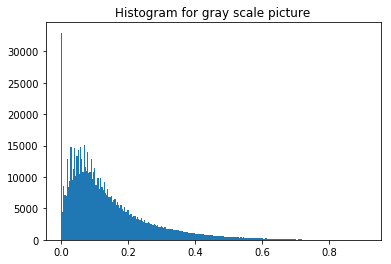

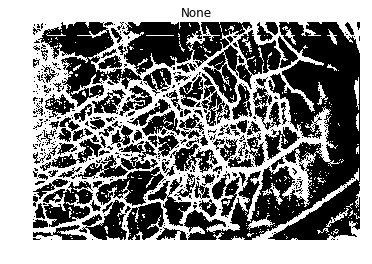

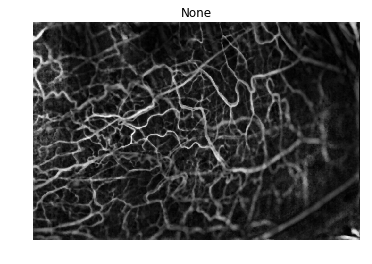

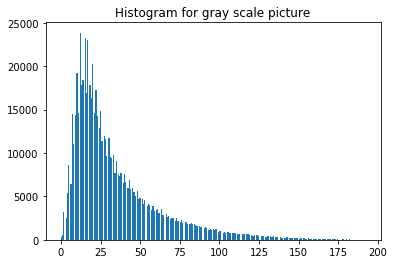

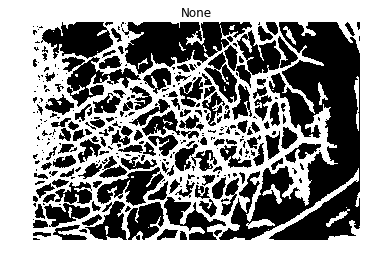

In [17]:
temp = rpp.luminosity_contrast_normalization(vesselThirdEq03,blockSize,resizedVal)
temp = cv2.normalize(img_as_float(temp), None, 0.0, 1.0, cv2.NORM_MINMAX)
tempHigh = threshold_otsu(vesselThirdEq03)

low = 0.15
high = tempHigh
rhf.show_on_jupyter(temp,'gray')
rhf.show_histogram(temp,'gray','float')

lowt = (temp > low).astype(int)
hight = (temp > high).astype(int)
hyst = filters.apply_hysteresis_threshold(temp, low, high)
hyst = hyst.astype('bool')
temp = morphology.remove_small_objects(hyst,50)
rhf.show_on_jupyter(temp,'gray')

tempLow = 0.125
tempHigh = threshold_otsu(vesselThirdEq03)

rhf.show_on_jupyter(vesselThirdEq03,'gray')
rhf.show_histogram(vesselThirdEq03,'gray','float')

lowt = (vesselThirdEq03 > low).astype(int)
hight = (vesselThirdEq03 > tempHigh).astype(int)
hyst = filters.apply_hysteresis_threshold(vesselThirdEq03, tempLow, tempHigh)
hyst = hyst.astype('bool')
temp = morphology.remove_small_objects(hyst,50)
rhf.show_on_jupyter(hyst,'gray')

tempStep = interval_mapping(vesselThirdEq03,0.0,1.0,0,255).astype('uint8')
med = median(tempStep, disk(3))

tempLow2 = 30
tempHigh2 = threshold_otsu(med)

rhf.show_on_jupyter(med,'gray')
rhf.show_histogram(med,'gray','float')

lowt = (med > low).astype(int)
hight = (med > tempHigh).astype(int)
hyst = filters.apply_hysteresis_threshold(med, tempLow2, tempHigh2)
hyst = hyst.astype('bool')
temp = morphology.remove_small_objects(hyst,50)
rhf.show_on_jupyter(hyst,'gray')


In [ ]:
def plot_figures(figures, nrows = 1, ncols=1):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    for ind,title in zip(range(len(figures)), figures):
        axeslist.ravel()[ind].imshow(figures[title], cmap=plt.jet())
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional



# generation of a dictionary of (title, images)
number_of_im = 20
w=10
h=10
figures = {vesselImg01,vesselImg02,vesselImg03}

# plot of the images in a figure, with 5 rows and 4 columns
plot_figures(figures, 5, 4)

plt.show()
'''
otsu
'''

#### Thresholding step.
use otsu's method. (but I should revise this step.)
I will use hysteresis thresholding.

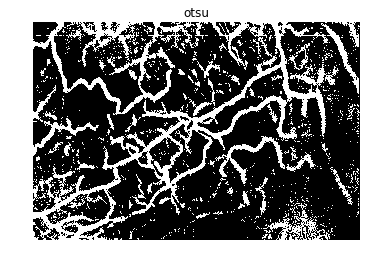

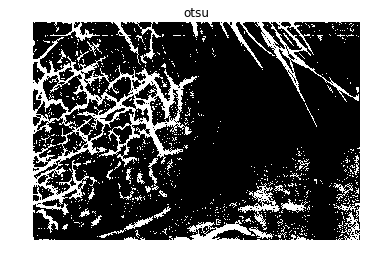

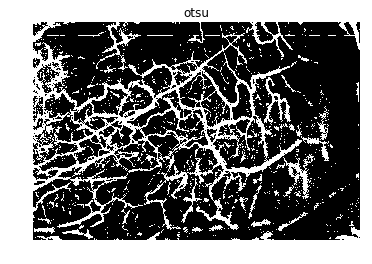

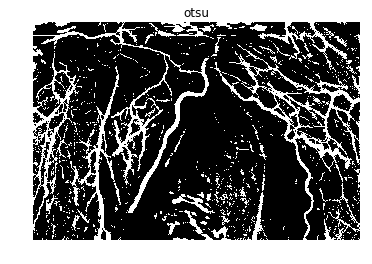

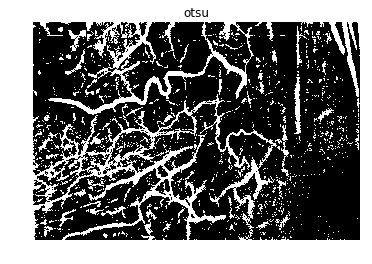

In [12]:
thresholdValue01 = threshold_otsu(vesselThirdEq01)
thresholdValue02 = threshold_otsu(vesselThirdEq02)
thresholdValue03 = threshold_otsu(vesselThirdEq03)
thresholdValue04 = threshold_otsu(vesselThirdEq04)
thresholdValue05 = threshold_otsu(vesselThirdEq05)

ret01, global_otsu01 = cv2.threshold(vesselThirdEq01, thresholdValue01, 1, cv2.THRESH_BINARY)
ret02, global_otsu02 = cv2.threshold(vesselThirdEq02, thresholdValue02, 1, cv2.THRESH_BINARY)
ret03, global_otsu03 = cv2.threshold(vesselThirdEq03, thresholdValue03, 1, cv2.THRESH_BINARY)
ret04, global_otsu04 = cv2.threshold(vesselThirdEq04, thresholdValue04, 1, cv2.THRESH_BINARY)
ret05, global_otsu05 = cv2.threshold(vesselThirdEq05, thresholdValue05, 1, cv2.THRESH_BINARY)

rhf.show_on_jupyter(global_otsu01,'gray','otsu')
rhf.show_on_jupyter(global_otsu02,'gray','otsu')
rhf.show_on_jupyter(global_otsu03,'gray','otsu')
rhf.show_on_jupyter(global_otsu04,'gray','otsu')
rhf.show_on_jupyter(global_otsu05,'gray','otsu')


#### postprocessing step.
connected component 

In [ ]:
temp01 = global_otsu01.astype('bool')
temp02 = global_otsu02.astype('bool')
temp03 = global_otsu03.astype('bool')
temp04 = global_otsu04.astype('bool')
temp05 = global_otsu05.astype('bool')

result01 = morphology.remove_small_objects(temp01,30)
result02 = morphology.remove_small_objects(temp02,30)
result03 = morphology.remove_small_objects(temp03,30)
result04 = morphology.remove_small_objects(temp04,30)
result05 = morphology.remove_small_objects(temp05,30)

rhf.show_on_jupyter(result01,'gray','otsu')
rhf.show_on_jupyter(result02,'gray','otsu')
rhf.show_on_jupyter(result03,'gray','otsu')
rhf.show_on_jupyter(result04,'gray','otsu')
rhf.show_on_jupyter(result05,'gray','otsu')

In [ ]:
tempImg = np.array(vesselImg01)
col,row = vesselImg01.shape
dCol, dRow = int(col /10), int(row/10)
print(vesselImg01.shape)
print(col, row)
print(dCol, dRow)
datasCol = [dCol *i for i in range(1,11)]
datasRow = [dRow *i for i in range(1,11)]
print(datasCol)
for tCol in datasCol:
    tempImg = cv2.line(tempImg,(0,tCol),(row,tCol),(255,255,255),3)
for tRow in datasRow:
    tempImg = cv2.line(tempImg,(tRow,0),(tRow,col),(255,255,255),3)
#tempImg = cv2.line(tempImg,(0,0),(500,500),(255,255,255),3)

rhf.show_on_jupyter(tempImg,'gray','image03')


In [ ]:
tempClaheImg03 = rpp.clahe_preprocessing(vesselImg01)
rhf.show_on_jupyter(tempClaheImg03,'gray','image03')
rhf.show_histogram(tempClaheImg03,'gray','float')

In [ ]:
tempWindow = np.array([[0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0],
                     [0,0,0,0,0,0,0]])
#print(tempWindow)
rotateNum = 18
degree = 180 / rotateNum
for cnt in range(rotateNum+1):
    rotateSe1 = rhf.strel_line(5,degree *cnt)
    print(rotateSe1)
    rhf.show_on_jupyter(rotateSe1,'gray','rotate')

In [11]:
for i in range(3):
    print(i)

0
1
2


In [15]:
rre =[]
rre = 3,2,1,3
print(rre)
print(rre[2])
for i in range(len(rre)):
    print(i)

(3, 2, 1, 3)
1
0
1
2
3
